In [92]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la

### Task 29

define quadratic function

Define parameters for curve

In [93]:
A1 = np.array([[1, 0], [0, 1]])
B1 = np.array([0, 0])
C1 = -1

A2 = np.array([[0, 0], [0, 1]])
B2 = np.array([1, 0])
C2 = 0

Evaluate quadratic function

In [94]:
def f(P, A, B, C):
    return P.T @ A @ P + B.T @ P + C

compute result space

In [95]:
def eval(A, B, C, x, y, n):
    S = np.zeros([n, n])
    for i in range(0, n):
        for j in range(0, n):
            p = np.array([x[i], y[j]])
            S[i][j] = f(p, A, B, C)
    return S

evaluate gradient

In [96]:
def grad(xy, A, B):
    x, y = xy
    dx = 2 * A[0][0] * x + 2 * A[0, 1] * y + B[0]  # x derivative
    dy = 2 * A[1][1] * y + 2 * A[0, 1] * x + B[1]  # y derivative
    return [dx, dy]

compute curve intersection points

In [97]:
def eval_intersection(start, max_iter = 6, eps = 1e-9):
    current = start

    for i in range(0, max_iter):
        v1 = f(current, A1, B1, C1)
        v2 = f(current, A2, B2, C2)
        v = [v1, v2]

        g1 = grad(current, A1, B1)
        g2 = grad(current, A2, B2)

        jacobi = np.vstack((g1, g2))

        update = current - la.inv(jacobi) @ v

        if la.norm(update - current) < eps:
            break
        current = update
    return update

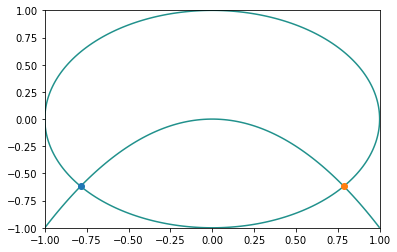

In [98]:
n = 100
x = [x for x in np.linspace(-1, 1, n)]
y = x.copy()

S1 = eval(A1, B1, C1, x, y, n)
S2 = eval(A2, B2, C2, x, y, n)

mesh1, mesh2 = np.meshgrid(x,y)

plt.contour(mesh1,mesh2,S1, 0)
plt.contour(mesh1,mesh2,S2, 0)

res1 = eval_intersection(np.array([-0.6,-0.75]))
plt.plot(res1[1], res1[0],  "o")

res2 = eval_intersection(np.array([-0.6, 0.75]))
plt.plot(res2[1], res2[0],  "o")

plt.show()